In [ ]:
                                                                 PROGRAM-4

In [1]:
Prepare a linear regression model for predicting the salary of user based on number of years of experience.

In [ ]:
CODE:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("salary-data.csv")

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.head(9)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0


In [ ]:
df["Salary"].nunique()

30

In [ ]:
df["YearsExperience"].nunique()

28

In [ ]:
#normalisation(scaling)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df1["Salary"]
x=df1.drop("Salary",axis=1)
y.shape,x.shape

((30,), (30, 1))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
#random state 1 means it will control my randomess,which means the trained data will act as train data everytime.
#if we do not control the randomess or accuracy will change or  will come different every time.
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 1), (9, 1), (21,), (9,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([1.02174576])

In [ ]:
model.intercept_

-0.018414426251790073

In [ ]:
y_test_predict=model.predict(x_test)

In [ ]:
y_test_predict

array([0.43811027, 0.63376372, 0.28593537, 0.51419772, 0.35115319,
       0.60115481, 0.89463497, 0.0794123 , 0.80767789])

In [ ]:
model.score(x_test,y_test)

0.9248580247217075

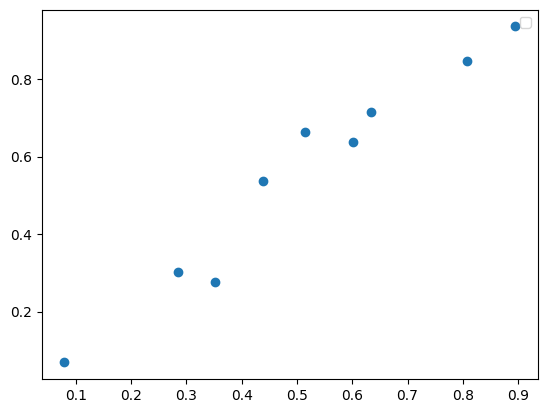

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(y_test_predict,y_test)
plt.legend()
plt.show()

([0], [Text(0, 0, 'YearsExperience')])

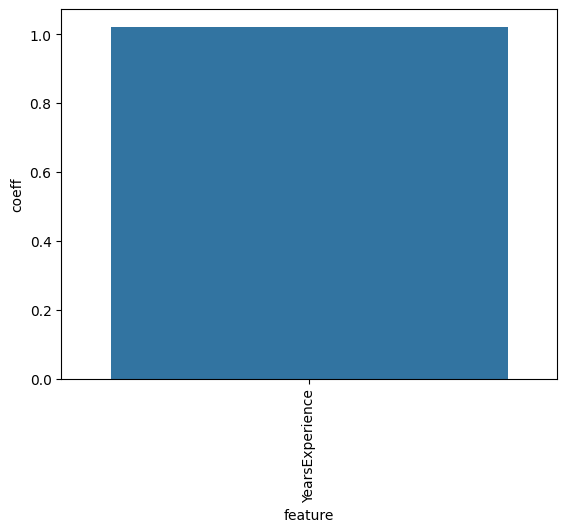

In [ ]:
import seaborn as sns
imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),
                   columns = ['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=90)

In [ ]:
imp.head()

,feature,coeff
0,YearsExperience,1.021746
